In [39]:
from matplotlib import pyplot as plt
import numpy as np
import mogreps
import netCDF4
import pandas as pd

In [41]:
import os
os.getcwd()

'/home/paula/Desktop/Metoffice'

In [40]:
from netCDF4 import Dataset
traindata = Dataset('ensemble_means_201401.nc')
print(dataset.file_format)

FileNotFoundError: [Errno 2] No such file or directory: b'ensemble_means_201401.nc'

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset.
traindata=pd.read_table('traindata.txt',usecols=[1,2,3,4,5,6,7,8])
testdata=pd.read_table('testdata.txt',usecols=[1,2,3,4,5,6,7,8])

In [32]:
traindata.head(20)

,date,speed,direction,X,Y,Xdes,Ydes,Sdes
0,2010-05-01 00:00:00,1.73,255.48,-0.433742,-1.674744,-0.666018,-0.444205,-0.646947
1,2010-05-01 00:01:00,1.89,259.31,-0.350586,-1.857199,-0.618833,-0.556258,-0.500709
2,2010-05-01 00:02:00,1.98,261.35,-0.297788,-1.957479,-0.588590,-0.617869,-0.418965
3,2010-05-01 00:03:00,1.96,258.68,-0.384725,-1.921871,-0.637782,-0.596210,-0.436449
4,2010-05-01 00:04:00,2.21,263.04,-0.267800,-2.193714,-0.570809,-0.763769,-0.209612
5,2010-05-01 00:05:00,2.43,260.63,-0.395627,-2.397578,-0.643347,-0.889484,-0.010574
6,2010-05-01 00:06:00,2.25,262.02,-0.312362,-2.228212,-0.594752,-0.786869,-0.172032
7,2010-05-01 00:07:00,2.22,264.61,-0.208535,-2.210184,-0.535277,-0.776954,-0.198066
8,2010-05-01 00:08:00,2.03,265.60,-0.155740,-2.024017,-0.504543,-0.664120,-0.367194
9,2010-05-01 00:09:00,2.22,264.00,-0.232053,-2.207839,-0.547431,-0.778340,-0.195630


In [33]:
traindata.describe()

,speed,direction,X,Y,Xdes,Ydes,Sdes
count,175680.000000,175680.000000,175680.000000,175680.000000,175680.000000,175680.000000,175680.000000
mean,2.734714,219.589237,0.541586,-1.038395,0.000032,-0.000163,-0.000104
std,1.396952,107.919880,2.157224,1.845257,1.001108,1.000811,1.002673
min,0.000000,0.000000,-8.902217,-11.572216,-4.205884,-5.898294,-2.127770
25%,1.720000,155.410000,-0.901483,-2.217666,-0.675422,-0.662991,-0.708067
50%,2.470000,248.660000,0.673236,-1.125988,0.063989,-0.063741,-0.157520
75%,3.510000,306.850000,1.879263,0.185078,0.622960,0.670063,0.542558
max,12.580000,360.000000,11.035973,8.248289,5.487034,4.393690,7.602734


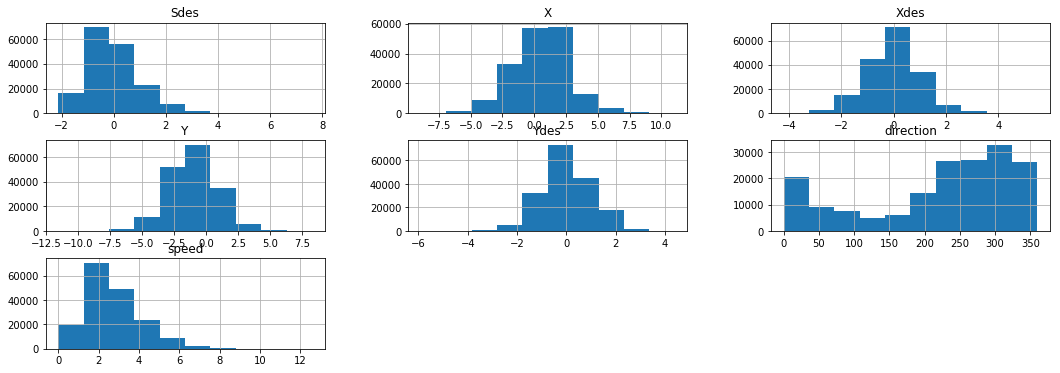

In [36]:
traindata.hist(figsize=(18,6))
plt.show()

In [13]:
# Split the data into training/testing sets.
humidity_train = np.array(traindata['Xdes'])
humidity_test = np.array(testdata['Xdes'])
pressure_train =  np.array(traindata['Ydes'])
pressure_test = np.array(testdata['Ydes'])
wind_train =  np.array(traindata['Sdes'])
wind_test = np.array(testdata['Sdes'])

predictors_train=np.stack((humidity_train,pressure_train,wind_train),axis=1)

In [29]:
df = pd.DataFrame(np.stack((humidity_train,pressure_train,wind_train, temperature_train),axis=1))

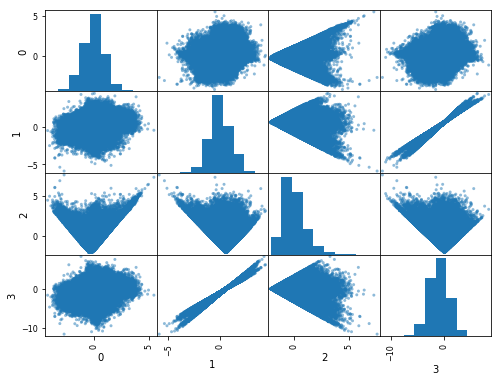

In [31]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(8,6))
plt.show()

In [5]:
# Split the targets into training/testing sets.
temperature_train = np.array(traindata['Y'])
temperature_test = np.array(testdata['Y'])

# Create linear regression object
regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(predictors_train,temperature_train)

# Make predictions using the testing set
temperature_pred = regr.predict(predictors_train,axis=1))

# The coefficients.
print('Coefficients: \n', regr.coef_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_pred))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_pred))



Coefficients: 
 [ 0.00801814  1.80948159 -0.00225465]
Mean squared error: 0.13
Variance score: 0.97


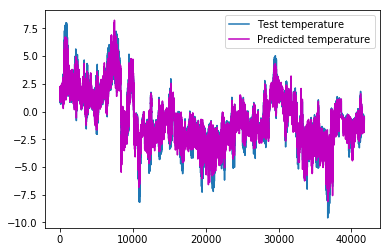

In [6]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.legend()

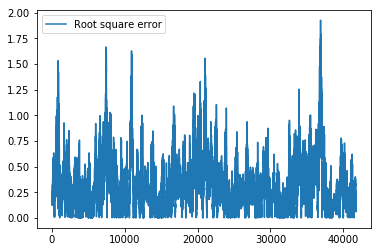

In [10]:
plt.plot(np.sqrt((temperature_test-temperature_pred)**2),label='Root square error')
plt.legend()

Text(0,0.5,'Predicted temperature')

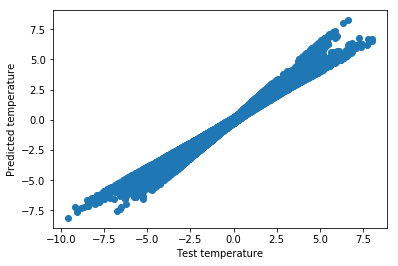

In [7]:
plt.scatter(temperature_test,temperature_pred)
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()